Load all packages you need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

Read the data.

In [2]:
df = pd.read_csv('C:\\Users\\v.weber\\Documents\\000 Master Wirtschaftsinformatik FU Berlin\\I\\Applied Analytics\\github stuff\\Applied-Analytics\\data\\diabetes.csv')

Let's deal with the missing data points in "BloodPressure". <br>
First remove the outlier from the last coding break.<br>
Create a copy of the outlier-filtered data frame and impute the missing values with the "BloodPressure" median value.

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df[(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)]
df_copy1 = df_filtered.copy()
df_copy2 = df_filtered.copy()
df_copy3 = df_filtered.copy()


In [27]:
df_copy1 = df_copy1['BloodPressure'].fillna(df_copy1['BloodPressure'].median(), inplace=False)

Create a second copy of the outlier-filtered data frame. <br>
Perform a hot-deck/distribution imputation. First, estimate the distribution parameters of "BloodPressure". Then, sample the values used for imputation.

In [29]:
from scipy import stats
mean = df_copy2['BloodPressure'].mean()
std = df_copy2['BloodPressure'].std()

# You could alternatively use a more complex method such as kernel density estimation (KDE), but normal distribution is a simple approach
# Define the distribution parameters
distribution = stats.norm(loc=mean, scale=std)

In [30]:
# Identify rows with missing values
missing_values = df_copy2['BloodPressure'].isna()

# Impute missing values by drawing from the estimated distribution
df_copy2.loc[missing_values, 'BloodPressure'] = distribution.rvs(size=missing_values.sum())

Create a third copy of the outlier-filtered data frame. <br>
Perform a regression-based imputation. First, choose 3 variables that are correlated with "BloodPressure" (Hint, create a correlation matrix or have a look at the "Associations"-Button in sweetviz).<br>
Second, fit a linear regression model with those three variables as predictors. Let's ignore for the moment that the other variables might also include outlier and missing data.<br>
Now, use the regression model to estimate the imputed value for each missing data point.

                                             |                                             | [  0%]   00:00 ->…

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

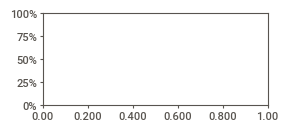

In [31]:
sv.analyze(df)

Now plot the original data next to the imputed data. Inspect the differences!